# 0. get X, Y

In [9]:
import pickle
import getXY_new
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

with open('getXY_new.pickle', 'rb') as f:
    get = pickle.load(f)

In [10]:
train_padded, y_train_onehot = get.get_train_set()
test_padded, y_test_onehot = get.get_test_set()

print(train_padded.shape, test_padded.shape)
print(np.max(train_padded)) # revised

(321638, 26) (107213, 26)
9999


# 1. Implementing 2 layer LSTM

In [16]:
from tensorflow.keras import models, layers

vocab_size = np.max(train_padded) + 1
embedding_dim = 200

model = models.Sequential()
model.add(layers.Embedding(input_dim = vocab_size, output_dim = embedding_dim,
                          embeddings_regularizer = 'l2', input_length = 26, mask_zero = True, trainable = True))
model.add(layers.LSTM(128, return_sequences = True))
model.add(layers.LSTM(128))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(20, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 26, 200)           2000000   
_________________________________________________________________
lstm_6 (LSTM)                (None, 26, 128)           168448    
_________________________________________________________________
lstm_7 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                2580      
Total params: 2,302,612
Trainable params: 2,302,612
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

In [19]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import warnings
warnings.filterwarnings('ignore')


callback_list = [ModelCheckpoint(filepath = 'LSTM_model2.h5', monitor = 'val_loss',
                                                    save_best_only = True),
                 EarlyStopping(patience = 5)]

history = model.fit(train_padded, y_train_onehot, batch_size = 2048, epochs = 20, callbacks = callback_list,
                   validation_data = (test_padded, y_test_onehot))

Train on 321638 samples, validate on 107213 samples
Epoch 1/20
321638/321638 [==============================] - 939s 3ms/sample - loss: 2.4193 - acc: 0.3362 - val_loss: 2.3374 - val_acc: 0.3585
Epoch 2/20
321638/321638 [==============================] - 906s 3ms/sample - loss: 2.3092 - acc: 0.3713 - val_loss: 2.2710 - val_acc: 0.3862
Epoch 3/20
321638/321638 [==============================] - 913s 3ms/sample - loss: 2.2395 - acc: 0.3977 - val_loss: 2.2028 - val_acc: 0.4059
Epoch 4/20
321638/321638 [==============================] - 884s 3ms/sample - loss: 2.1909 - acc: 0.4123 - val_loss: 2.1623 - val_acc: 0.4188
Epoch 5/20
321638/321638 [==============================] - 1050s 3ms/sample - loss: 2.1621 - acc: 0.4200 - val_loss: 2.1575 - val_acc: 0.4220
Epoch 6/20
321638/321638 [==============================] - 1078s 3ms/sample - loss: 2.1436 - acc: 0.4252 - val_loss: 2.1226 - val_acc: 0.4282
Epoch 7/20
321638/321638 [==============================] - 1056s 3ms/sample - loss: 2.1201 - 

In [20]:
from tensorflow.keras.models import load_model

restored_model = load_model('LSTM_model2.h5')

restored_model.evaluate(test_padded, y_test_onehot, verbose = 1)

107213/107213 [==============================] - 137s 1ms/sample - loss: 1.9738 - acc: 0.4655


[1.973839108397978, 0.4654566]

In [21]:
restored_model.save_weights('LSTM_weights2.h5')

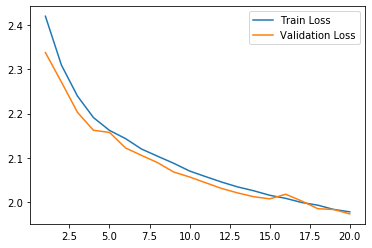

In [23]:
import matplotlib.pyplot as plt
epochs = np.arange(1, 21)
plt.plot(epochs, history.history['loss'], label = 'Train Loss')
plt.plot(epochs, history.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.savefig('LSTM_loss2.png')
plt.show()

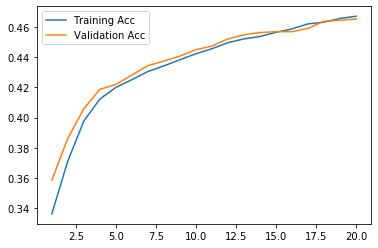

In [24]:
plt.plot(epochs, history.history['acc'], label = 'Training Acc')
plt.plot(epochs, history.history['val_acc'], label = 'Validation Acc')
plt.legend()
plt.savefig('LSTM_acc2.png')
plt.show()